In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file into a DataFrame
data_df = pd.read_csv('LAX_DATA_INPUT.csv')

# Check the shape of the dataFrame
data_df.shape

(5624, 32)

In [3]:
data_df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,INTERESTED,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,ESCHOOL,HSCHOOL,BUS_COUNTS,FnB_COUNTS
0,MLS Listing,NaN,Multi-Family (2-4 Unit),561 E Opp St,Wilmington,CA,90744,299000,0.0,0.0,...,Y,33.783303,-118.255513,374,4537.790498,7038,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,16.0,0.0
1,MLS Listing,NaN,Vacant Land,0 Future Pl,Los Angeles,CA,90065,199000,0.0,0.0,...,Y,34.101025,-118.231056,2687,3909.505004,2717,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,21.0,0.0
2,MLS Listing,NaN,Mobile/Manufactured Home,13120 Bradley Ave Spc 56,Sylmar,CA,91342,224900,2.0,2.0,...,Y,34.309203,-118.462502,2637,3951.118299,21211,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,9.0,0.0
3,MLS Listing,NaN,Vacant Land,8360 N UTICA Dr,Hollywood Hills,CA,90046,77777,0.0,0.0,...,Y,34.107620,-118.372406,4479,4328.917170,3856,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,0.0,1.0
4,MLS Listing,NaN,Vacant Land,0 Fenn St,Los Angeles,CA,90031,25000,0.0,0.0,...,Y,34.084489,-118.207177,1599,1804.167233,766,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,26.0,0.0


In [4]:
# Check out null values
null_sum = data_df.isnull().sum()
null_sum

SALE TYPE                                                                                         0
SOLD DATE                                                                                      5624
PROPERTY TYPE                                                                                     0
ADDRESS                                                                                          10
CITY                                                                                              1
STATE OR PROVINCE                                                                                 0
ZIP OR POSTAL CODE                                                                                0
PRICE                                                                                             0
BEDS                                                                                              0
BATHS                                                                                             0


In [5]:
# I want to keep the HOA information for future use
# drop columns with more than 4205 null values
data_df.drop(columns=data_df.columns[null_sum > 4205], inplace=True)

In [6]:
# Fill in null with zero
data_df['HOA/MONTH'].fillna(0, inplace=True)

In [7]:
data_df.shape, data_df.columns

((5624, 31),
 Index(['SALE TYPE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE',
        'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION',
        'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
        '$/SQUARE FEET', 'HOA/MONTH', 'STATUS',
        'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
        'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE',
        'PARK_DIST', 'HOSPITAL_D', 'RAIL_DIST', 'ESCHOOL', 'HSCHOOL',
        'BUS_COUNTS', 'FnB_COUNTS'],
       dtype='object'))

In [8]:
# Select categorical data
cat_col = ['SALE TYPE', 'PROPERTY TYPE', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOCATION', 'STATUS', 'SOURCE','FAVORITE','INTERESTED','ESCHOOL','HSCHOOL']
data_df[cat_col] = data_df[cat_col].astype('category')
data_df[cat_col]

,SALE TYPE,PROPERTY TYPE,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,LOCATION,STATUS,SOURCE,FAVORITE,INTERESTED,ESCHOOL,HSCHOOL
0,MLS Listing,Multi-Family (2-4 Unit),Wilmington,CA,90744,196 - East Wilmington,Active,CRMLS,N,Y,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL
1,MLS Listing,Vacant Land,Los Angeles,CA,90065,Mt Washington,Active,TheMLS,N,Y,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL
2,MLS Listing,Mobile/Manufactured Home,Sylmar,CA,91342,Sylmar,Active,AVMLS,N,Y,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL
3,MLS Listing,Vacant Land,Hollywood Hills,CA,90046,C03 - Sunset Strip - Hollywood Hills West,Active,CRMLS,N,Y,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL
4,MLS Listing,Vacant Land,Los Angeles,CA,90031,679 - Montecito Heights,Active,CRMLS,N,Y,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL
...,...,...,...,...,...,...,...,...,...,...,...,...
5619,MLS Listing,Single Family Residential,Pacific Palisades,CA,90272,Pacific Palisades,Active,TheMLS,N,Y,MONTEBELLO UNIFIED SCHOOL,MONTEBELLO UNIFIED SCHOOL
5620,MLS Listing,Single Family Residential,Los Angeles,CA,90024,Bel Air - Holmby Hills,Active,TheMLS,N,Y,MONTEBELLO UNIFIED SCHOOL,MONTEBELLO UNIFIED SCHOOL
5621,MLS Listing,Single Family Residential,Los Angeles,CA,90069,Sunset Strip - Hollywood Hills West,Active,TheMLS,N,Y,PALOS VERDES PEN UNIF SCHOOL,PALOS VERDES PEN UNIF SCHOOL
5622,MLS Listing,Single Family Residential,Beverly Hills,CA,90210,Beverly Hills Post Office,Active,TheMLS,N,Y,ALHAMBRA USD,ALHAMBRA USD


In [9]:
# the following columns now all have the categorical data types
data_df[cat_col].dtypes

SALE TYPE             category
PROPERTY TYPE         category
CITY                  category
STATE OR PROVINCE     category
ZIP OR POSTAL CODE    category
LOCATION              category
STATUS                category
SOURCE                category
FAVORITE              category
INTERESTED            category
ESCHOOL               category
HSCHOOL               category
dtype: object

In [10]:
# double check the remaining categories 
# Now they are all in Chicago :)
data_df['CITY'].astype('string').value_counts()

Los Angeles       3245
Beverly Hills      135
Woodland Hills     135
Sherman Oaks       127
Venice             124
                  ... 
Hancock Park         1
Brentwood            1
Mar Vista            1
Sun Village          1
Alhambra             1
Name: CITY, Length: 99, dtype: Int64

In [11]:
# check the data of PROPERTY TYPE
data_df['PROPERTY TYPE'].value_counts() 

Single Family Residential    2498
Condo/Co-op                  1044
Multi-Family (2-4 Unit)       864
Vacant Land                   609
Multi-Family (5+ Unit)        387
Townhouse                     171
Mobile/Manufactured Home       48
Unknown                         3
Name: PROPERTY TYPE, dtype: int64

In [12]:
# Merge two seperate multi-family categories into one single category
data_df['PROPERTY TYPE'].replace(['Multi-Family (5+ Unit)', 'Multi-Family (2-4 Unit)'],'Multi-Family', inplace=True)

In [13]:
data_df['PROPERTY TYPE'].value_counts() 

Single Family Residential    2498
Multi-Family                 1251
Condo/Co-op                  1044
Vacant Land                   609
Townhouse                     171
Mobile/Manufactured Home       48
Unknown                         3
Name: PROPERTY TYPE, dtype: int64

In [14]:
# Rename some complicated feature names
data_df = data_df.rename(columns={'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)': 'URL',
                                   'STATE OR PROVINCE': 'STATE',
                                   'ZIP OR POSTAL CODE': 'ZIP',
                                   'SQUARE FEET': 'SQFT',
                                   'PROPERTY TYPE': 'PROP_TYPE',
                                   'LOT SIZE': 'LOT',
                                   'YEAR BUILT': 'YR_BUILT',
                                   '$/SQUARE FEET': 'PRICE_SQFT',
                                   })

In [15]:
data_df.head()

,SALE TYPE,PROP_TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,LOCATION,...,INTERESTED,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,ESCHOOL,HSCHOOL,BUS_COUNTS,FnB_COUNTS
0,MLS Listing,Multi-Family,561 E Opp St,Wilmington,CA,90744,299000,0.0,0.0,196 - East Wilmington,...,Y,33.783303,-118.255513,374,4537.790498,7038,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,16.0,0.0
1,MLS Listing,Vacant Land,0 Future Pl,Los Angeles,CA,90065,199000,0.0,0.0,Mt Washington,...,Y,34.101025,-118.231056,2687,3909.505004,2717,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,21.0,0.0
2,MLS Listing,Mobile/Manufactured Home,13120 Bradley Ave Spc 56,Sylmar,CA,91342,224900,2.0,2.0,Sylmar,...,Y,34.309203,-118.462502,2637,3951.118299,21211,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,9.0,0.0
3,MLS Listing,Vacant Land,8360 N UTICA Dr,Hollywood Hills,CA,90046,77777,0.0,0.0,C03 - Sunset Strip - Hollywood Hills West,...,Y,34.107620,-118.372406,4479,4328.917170,3856,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,0.0,1.0
4,MLS Listing,Vacant Land,0 Fenn St,Los Angeles,CA,90031,25000,0.0,0.0,679 - Montecito Heights,...,Y,34.084489,-118.207177,1599,1804.167233,766,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,26.0,0.0


In [16]:
null_sum = data_df.isnull().sum()
null_sum

SALE TYPE          0
PROP_TYPE          0
ADDRESS           10
CITY               1
STATE              0
ZIP                0
PRICE              0
BEDS               0
BATHS              0
LOCATION          10
SQFT               0
LOT                0
YR_BUILT           0
DAYS ON MARKET     0
PRICE_SQFT         0
HOA/MONTH          0
STATUS             0
URL                0
SOURCE             0
MLS#               0
FAVORITE           0
INTERESTED         0
LATITUDE           0
LONGITUDE          0
PARK_DIST          0
HOSPITAL_D         0
RAIL_DIST          0
ESCHOOL            1
HSCHOOL            1
BUS_COUNTS         0
FnB_COUNTS         0
dtype: int64

In [17]:
print(len(data_df))
data_df.dropna(inplace=True)
print(len(data_df))

5624
5605


In [18]:
null_sum = data_df.isnull().sum()
null_sum

SALE TYPE         0
PROP_TYPE         0
ADDRESS           0
CITY              0
STATE             0
ZIP               0
PRICE             0
BEDS              0
BATHS             0
LOCATION          0
SQFT              0
LOT               0
YR_BUILT          0
DAYS ON MARKET    0
PRICE_SQFT        0
HOA/MONTH         0
STATUS            0
URL               0
SOURCE            0
MLS#              0
FAVORITE          0
INTERESTED        0
LATITUDE          0
LONGITUDE         0
PARK_DIST         0
HOSPITAL_D        0
RAIL_DIST         0
ESCHOOL           0
HSCHOOL           0
BUS_COUNTS        0
FnB_COUNTS        0
dtype: int64

In [19]:
len(data_df)

5605

In [20]:
average_sqft = data_df[data_df['SQFT'] != 0]['SQFT'].mean()

data_df.loc[data_df['SQFT'] == 0, 'SQFT'] = average_sqft

average_yr = data_df[data_df['YR_BUILT'] != 0]['YR_BUILT'].mean()

data_df.loc[data_df['YR_BUILT'] == 0, 'YR_BUILT'] = average_yr

In [21]:
data_df['PRICE_SQFT'] = (data_df['PRICE'] / data_df['SQFT'])

In [22]:
num_col = ['PRICE', 'BEDS', 'BATHS', 'SQFT', 'YR_BUILT', 'PRICE_SQFT', 'HOA/MONTH', 'PARK_DIST', 'HOSPITAL_D', 'RAIL_DIST', 'BUS_COUNTS', 'FnB_COUNTS']

In [23]:
data_df[num_col].describe()

,PRICE,BEDS,BATHS,SQFT,YR_BUILT,PRICE_SQFT,HOA/MONTH,PARK_DIST,HOSPITAL_D,RAIL_DIST,BUS_COUNTS,FnB_COUNTS
count,5.605000e+03,5605.000000,5605.000000,5605.000000,5605.000000,5.605000e+03,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000
mean,2.770490e+06,4.072792,3.643131,3223.827433,1962.980816,2.492275e+03,274.454594,2520.235861,3186.640986,6235.463336,19.304193,14.340767
std,6.827056e+06,4.751766,5.112597,3999.833309,32.890091,4.682465e+04,999.613284,1557.383885,2013.391247,6964.367634,19.250844,32.377494
min,1.000000e+00,0.000000,0.000000,1.000000,1871.000000,3.101903e-04,0.000000,83.000000,107.364795,28.000000,0.000000,0.000000
25%,7.690000e+05,2.000000,2.000000,1462.000000,1938.000000,4.457348e+02,0.000000,1320.000000,1684.097479,1664.000000,7.000000,0.000000
50%,1.299000e+06,3.000000,2.500000,2370.000000,1962.980816,6.415584e+02,0.000000,2206.000000,2833.889964,3445.000000,16.000000,3.000000
75%,2.499000e+06,5.000000,4.000000,3299.000000,1983.000000,9.152216e+02,3.000000,3487.000000,4211.772510,7543.000000,26.000000,12.000000
max,1.950000e+08,91.000000,130.000000,105940.000000,2026.000000,2.150000e+06,39249.000000,10131.000000,12897.155325,31699.000000,129.000000,258.000000


<Axes: xlabel='YR_BUILT'>

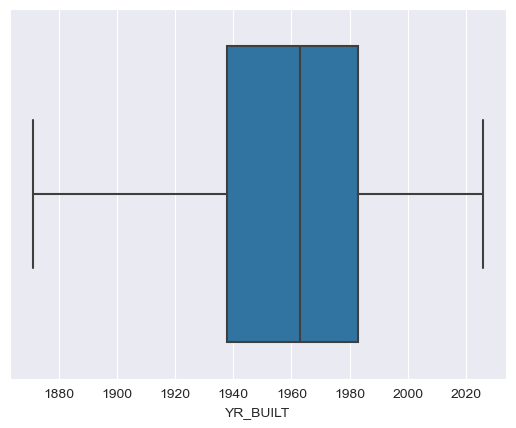

In [24]:
# draw box plot to check outliers
attr = 'YR_BUILT'
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df[attr], orient='h')

In [25]:
Q1 = data_df[attr].quantile(0.25)
Q3 = data_df[attr].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
print(Q1, Q3, lower_thresh, upper_thresh)

1938.0 1983.0 1870.5 2050.5


In [26]:
import copy
data_check = copy.deepcopy(data_df)

data_check



,SALE TYPE,PROP_TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,LOCATION,...,INTERESTED,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,ESCHOOL,HSCHOOL,BUS_COUNTS,FnB_COUNTS
0,MLS Listing,Multi-Family,561 E Opp St,Wilmington,CA,90744,299000,0.0,0.0,196 - East Wilmington,...,Y,33.783303,-118.255513,374,4537.790498,7038,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,16.0,0.0
1,MLS Listing,Vacant Land,0 Future Pl,Los Angeles,CA,90065,199000,0.0,0.0,Mt Washington,...,Y,34.101025,-118.231056,2687,3909.505004,2717,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,21.0,0.0
2,MLS Listing,Mobile/Manufactured Home,13120 Bradley Ave Spc 56,Sylmar,CA,91342,224900,2.0,2.0,Sylmar,...,Y,34.309203,-118.462502,2637,3951.118299,21211,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,9.0,0.0
3,MLS Listing,Vacant Land,8360 N UTICA Dr,Hollywood Hills,CA,90046,77777,0.0,0.0,C03 - Sunset Strip - Hollywood Hills West,...,Y,34.107620,-118.372406,4479,4328.917170,3856,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,0.0,1.0
4,MLS Listing,Vacant Land,0 Fenn St,Los Angeles,CA,90031,25000,0.0,0.0,679 - Montecito Heights,...,Y,34.084489,-118.207177,1599,1804.167233,766,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,MLS Listing,Multi-Family,1439 N Curson Ave,Los Angeles,CA,90046,6400000,4.0,20.0,Hollywood,...,Y,34.097388,-118.355361,4078,3366.153172,1953,MONTEBELLO UNIFIED SCHOOL,MONTEBELLO UNIFIED SCHOOL,30.0,14.0
5619,MLS Listing,Single Family Residential,1490 San Remo Dr,Pacific Palisades,CA,90272,19999000,5.0,6.5,Pacific Palisades,...,Y,34.057075,-118.497504,3201,4068.317339,4939,MONTEBELLO UNIFIED SCHOOL,MONTEBELLO UNIFIED SCHOOL,12.0,0.0
5620,MLS Listing,Single Family Residential,133 S Mapleton Dr,Los Angeles,CA,90024,65000000,9.0,12.0,Bel Air - Holmby Hills,...,Y,34.081662,-118.433378,4338,2501.337180,6105,MONTEBELLO UNIFIED SCHOOL,MONTEBELLO UNIFIED SCHOOL,10.0,0.0
5621,MLS Listing,Single Family Residential,1521 N Kings Rd,Los Angeles,CA,90069,6195000,4.0,4.5,Sunset Strip - Hollywood Hills West,...,Y,34.098730,-118.374607,5250,3109.259248,4031,PALOS VERDES PEN UNIF SCHOOL,PALOS VERDES PEN UNIF SCHOOL,9.0,2.0


In [27]:
for attr in num_col:
    Q1 = data_check[attr].quantile(0.25)
    Q3 = data_check[attr].quantile(0.75)
    IQR = Q3 - Q1
    lower_thresh = Q1 - 1.5 * IQR
    upper_thresh = Q3 + 1.5 * IQR
    print(attr, Q1, Q3, lower_thresh, upper_thresh)

    # Use | for logical OR and additional parentheses for proper order of operations
    data_check.drop(data_check[(data_check[attr] > upper_thresh) | (data_check[attr] < lower_thresh)].index, inplace=True)

# Print the length of the filtered DataFrame
print(len(data_check))


PRICE 769000.0 2499000.0 -1826000.0 5094000.0
BEDS 2.0 4.0 -1.0 7.0
BATHS 1.0 3.0 -2.0 6.0
SQFT 1340.0 3223.827432733158 -1485.7411490997365 6049.568581832895
YR_BUILT 1938.0 1980.0 1875.0 2043.0
PRICE_SQFT 460.4961434229727 873.9731094006507 -159.7193055435444 1494.1885583671678
HOA/MONTH 0.0 309.75 -464.625 774.375
PARK_DIST 1277.0 3437.25 -1963.375 6677.625
HOSPITAL_D 1852.126301356895 4418.72016258444 -1997.7644904844224 8268.610954425758
RAIL_DIST 1664.75 8447.75 -8509.75 18622.25
BUS_COUNTS 9.0 27.0 -18.0 54.0
FnB_COUNTS 0.0 10.0 -15.0 25.0
2937


In [28]:
# Export df to csv:

data_check.to_csv('LAX_DATA_OUTPUT.csv')